<a href="https://colab.research.google.com/github/abdulwahab724/adChatbot/blob/main/EDA_Tehzeeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Load the dataset from Colab storage (file already uploaded)
import pandas as pd
import numpy as np

# Load the Excel file directly from Colab storage
df = pd.read_excel('Dataset.xlsx', sheet_name='User_Stories')

print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded: 12847 rows × 24 columns


In [ ]:
# 1. DATASET OVERVIEW - Simple and clear
print("="*80)
print("📋 1. DATASET OVERVIEW")
print("="*80)
print()

print(f"{'Metric':<20} {'Value'}")
print("-" * 50)
print(f"{'Total Stories':<20} {df.shape[0]:,}")
print(f"{'Total Columns':<20} {df.shape[1]}")
print(f"{'Date Range':<20} {df['CreationDate'].min().strftime('%b %d, %Y')} to {df['CreationDate'].max().strftime('%b %d, %Y')}")
print(f"{'File Size (MB)':<20} {df.memory_usage(deep=True).sum() / 1024**2:.2f}")
print()

📋 1. DATASET OVERVIEW

Metric               Value
--------------------------------------------------
Total Stories        12,847
Total Columns        24
Date Range           Jan 01, 2023 to Oct 18, 2023
File Size (MB)       6.60



In [ ]:
# 2. COLUMNS WE'RE KEEPING - Visual list
print("="*80)
print("📝 2. COLUMNS IN CLEANED DATASET")
print("="*80)
print()

print(f"{'Column Name':<30} {'Category':<35} {'Data Type':<15}")
print("-" * 80)

for col in df_cleaned.columns:
    if col == 'StoryText':
        category = '📖 Input (Text to analyze)'
    elif col in ['SemanticAmbiguity', 'ScopeAmbiguity', 'ActorAmbiguity',
                 'AcceptanceAmbiguity', 'DependencyAmbiguity',
                 'PriorityAmbiguity', 'TechnicalAmbiguity']:
        category = '🎯 Target (What we predict)'
    else:
        continue

    print(f"{col:<30} {category:<35} {str(df_cleaned[col].dtype):<15}")

print()

📝 2. COLUMNS IN CLEANED DATASET

Column Name                    Category                            Data Type      
--------------------------------------------------------------------------------
StoryText                      📖 Input (Text to analyze)           object         
SemanticAmbiguity              🎯 Target (What we predict)          bool           
ScopeAmbiguity                 🎯 Target (What we predict)          bool           
ActorAmbiguity                 🎯 Target (What we predict)          bool           
AcceptanceAmbiguity            🎯 Target (What we predict)          bool           
DependencyAmbiguity            🎯 Target (What we predict)          bool           
PriorityAmbiguity              🎯 Target (What we predict)          bool           
TechnicalAmbiguity             🎯 Target (What we predict)          bool           



In [ ]:
# 3. NULL VALUES CHECK - Traffic light style
print("="*80)
print("✅ 3. DATA COMPLETENESS CHECK")
print("="*80)

null_count = df.isnull().sum().sum()

if null_count == 0:
    print("🟢 EXCELLENT: No missing data found!")
    print("   ✓ All 12,847 stories have complete information")
else:
    print(f"🔴 WARNING: {null_count} missing values found")

    # Show which columns have nulls
    null_cols = df.isnull().sum()
    null_cols = null_cols[null_cols > 0]

    for col, count in null_cols.items():
        print(f"   • {col}: {count} missing ({count/len(df)*100:.1f}%)")

print()

✅ 3. DATA COMPLETENESS CHECK
🟢 EXCELLENT: No missing data found!
   ✓ All 12,847 stories have complete information



🎯 4. AMBIGUITY DISTRIBUTION


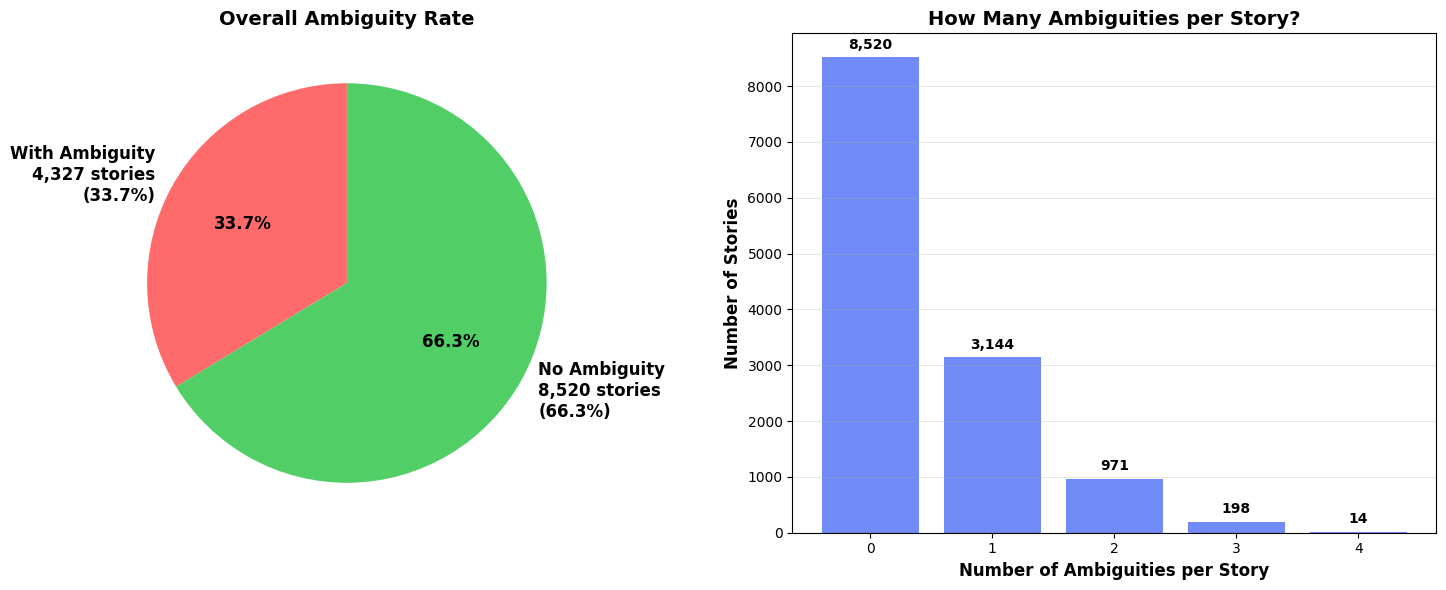


📊 Key Finding:
   • 33.7% of stories have at least one ambiguity
   • 66.3% of stories are clear and unambiguous



In [ ]:
import matplotlib.pyplot as plt

# 4. AMBIGUITY DISTRIBUTION - Big visual pie chart
print("="*80)
print("🎯 4. AMBIGUITY DISTRIBUTION")
print("="*80)

has_amb = df['HasAmbiguity'].value_counts()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors = ['#ff6b6b', '#51cf66']
labels = [f'With Ambiguity\n{has_amb.get(True, 0):,} stories\n({has_amb.get(True, 0)/len(df)*100:.1f}%)',
          f'No Ambiguity\n{has_amb.get(False, 0):,} stories\n({has_amb.get(False, 0)/len(df)*100:.1f}%)']

ax1.pie([has_amb.get(True, 0), has_amb.get(False, 0)],
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 12, 'weight': 'bold'})
ax1.set_title('Overall Ambiguity Rate', fontsize=14, weight='bold')

# Bar chart for ambiguity count
amb_count = df['AmbiguityCount'].value_counts().sort_index()
ax2.bar(amb_count.index, amb_count.values, color='#4c6ef5', alpha=0.8)
ax2.set_xlabel('Number of Ambiguities per Story', fontsize=12, weight='bold')
ax2.set_ylabel('Number of Stories', fontsize=12, weight='bold')
ax2.set_title('How Many Ambiguities per Story?', fontsize=14, weight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(amb_count.values):
    ax2.text(i, v + 100, f'{v:,}', ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Key Finding:")
print(f"   • {has_amb.get(True, 0)/len(df)*100:.1f}% of stories have at least one ambiguity")
print(f"   • {has_amb.get(False, 0)/len(df)*100:.1f}% of stories are clear and unambiguous")
print()

🔍 5. TYPES OF AMBIGUITIES FOUND


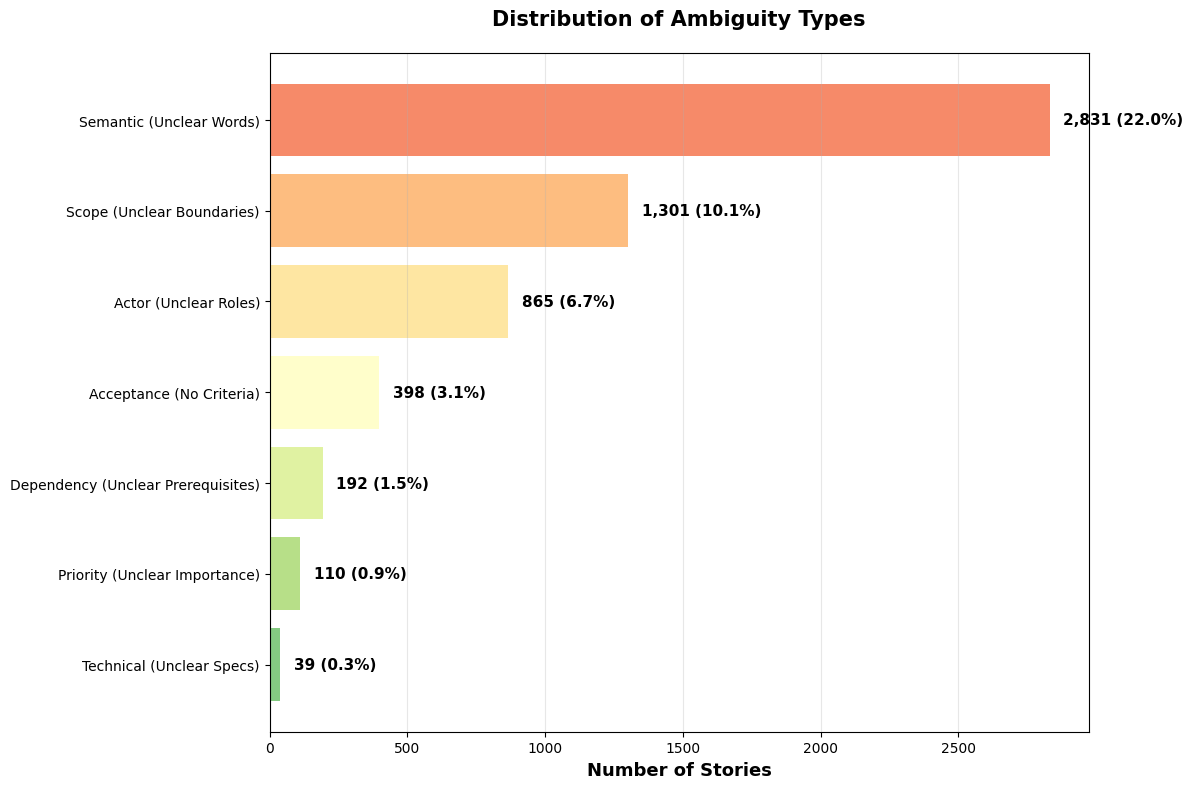


📋 Summary Table:

Type                                     Count      Percentage  
-----------------------------------------------------------------
Semantic (Unclear Words)                 2,831      22.04%
Scope (Unclear Boundaries)               1,301      10.13%
Actor (Unclear Roles)                    865        6.73%
Acceptance (No Criteria)                 398        3.10%
Dependency (Unclear Prerequisites)       192        1.49%
Priority (Unclear Importance)            110        0.86%
Technical (Unclear Specs)                39         0.30%



In [ ]:
# 5. AMBIGUITY TYPES - Colorful horizontal bar chart
print("="*80)
print("🔍 5. TYPES OF AMBIGUITIES FOUND")
print("="*80)

ambiguity_types = {
    'SemanticAmbiguity': 'Semantic (Unclear Words)',
    'ScopeAmbiguity': 'Scope (Unclear Boundaries)',
    'ActorAmbiguity': 'Actor (Unclear Roles)',
    'AcceptanceAmbiguity': 'Acceptance (No Criteria)',
    'DependencyAmbiguity': 'Dependency (Unclear Prerequisites)',
    'PriorityAmbiguity': 'Priority (Unclear Importance)',
    'TechnicalAmbiguity': 'Technical (Unclear Specs)'
}

amb_data = []
for col, label in ambiguity_types.items():
    if col in df.columns:
        count = df[col].sum()
        percentage = (count / len(df)) * 100
        amb_data.append({
            'Type': label,
            'Count': count,
            'Percentage': percentage
        })

amb_df = pd.DataFrame(amb_data).sort_values('Count', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

colors_gradient = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(amb_df)))
bars = ax.barh(amb_df['Type'], amb_df['Count'], color=colors_gradient, alpha=0.8)

ax.set_xlabel('Number of Stories', fontsize=13, weight='bold')
ax.set_title('Distribution of Ambiguity Types', fontsize=15, weight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (count, pct) in enumerate(zip(amb_df['Count'], amb_df['Percentage'])):
    ax.text(count + 50, i, f'{count:,} ({pct:.1f}%)',
            va='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# Print summary table
print("\n📋 Summary Table:")
print()
amb_summary = amb_df.sort_values('Count', ascending=False)[['Type', 'Count', 'Percentage']]

print(f"{'Type':<40} {'Count':<10} {'Percentage':<12}")
print("-" * 65)
for _, row in amb_summary.iterrows():
    print(f"{row['Type']:<40} {int(row['Count']):<10,} {row['Percentage']:.2f}%")
print()

In [ ]:
# 6. DUPLICATES CHECK - Simple YES/NO
print("="*80)
print("🔄 6. DUPLICATE RECORDS CHECK")
print("="*80)

duplicate_rows = df.duplicated().sum()
duplicate_ids = df['StoryID'].duplicated().sum()

if duplicate_rows == 0 and duplicate_ids == 0:
    print("🟢 EXCELLENT: No duplicates found!")
    print("   ✓ All stories are unique")
else:
    if duplicate_rows > 0:
        print(f"🔴 WARNING: {duplicate_rows} duplicate rows found")
    if duplicate_ids > 0:
        print(f"🔴 WARNING: {duplicate_ids} duplicate StoryIDs found")

print()

🔄 6. DUPLICATE RECORDS CHECK
🟢 EXCELLENT: No duplicates found!
   ✓ All stories are unique



In [ ]:
# Optional: Check for unusually long or short story texts
print("="*80)
print("📏 TEXT LENGTH CHECK")
print("="*80)

df_cleaned['text_length'] = df_cleaned['StoryText'].str.len()

print(f"Shortest story: {df_cleaned['text_length'].min()} characters")
print(f"Longest story: {df_cleaned['text_length'].max()} characters")
print(f"Average length: {df_cleaned['text_length'].mean():.0f} characters")

# Show examples
print("\n📌 Shortest story:")
print(df_cleaned.loc[df_cleaned['text_length'].idxmin(), 'StoryText'])

print("\n📌 Longest story:")
print(df_cleaned.loc[df_cleaned['text_length'].idxmax(), 'StoryText'])

# Drop the temporary column
df_cleaned = df_cleaned.drop('text_length', axis=1)

📏 TEXT LENGTH CHECK
Shortest story: 50 characters
Longest story: 168 characters
Average length: 80 characters

📌 Shortest story:
As a buyer, I want to checkout so I can save money

📌 Longest story:
As a financial advisor, I would like to process application to comply with regulations with fast performance with detailed specifications and comprehensive requirements
